In [17]:
import pandas as pd
original_data = pd.read_csv('original_data.csv')
original_data.head(5)

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,Fall - 2015,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,Fall - 2013,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,Fall - 2015,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,Fall - 2011,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1


In [18]:
original_data.columns

Index(['userName', 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV', 'univName', 'admit'],
      dtype='object')

In [19]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [20]:
# delete those columns which contains too much nan
#删除缺失值比例过高的列
res = []
column_nan_rank = original_data.isna().sum()/original_data.shape[0]
ranking = column_nan_rank.sort_values()
delete_list = []
for i in range(len(ranking)):
    if ranking[i]>0.1:
        delete_list.append(ranking.index[i])
for i in delete_list:
    original_data.drop(i,axis=1,inplace=True)
original_data

,userName,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,...,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,cgpa,cgpaScale,univName,admit
0,143saf,Systems and Control,0,18,112.0,MS,Instrumentation & Control,5.0,160.0,167.0,...,0,4.5,8.9,Fall - 2015,0,Dharamsinh Desai University,8.50,10,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,MS,0,0.0,NaN,NaN,...,0,NaN,0.0,Fall - 2013,0,NaN,0.00,0,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,94.0,MS,Computer Engineering,0.0,146.0,157.0,...,0,3.0,81.0,Fall - 2015,0,IET DAVV,78.28,100,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.00,0,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,81.0,MS,computer,0.0,420.0,770.0,...,0,2.5,70.0,Fall - 2011,0,Pune University,57.00,100,Worcester Polytechnic Institute,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53639,zapp11,Mechanical Engineering,0,24,98.0,MS,Production Engineering,12.0,151.0,152.0,...,0,3.0,0.0,Fall - 2014,0,University of Mumbai,71.00,100,Arizona State University,0
53640,zathurian,Electronics and Communication,0,0,115.0,MS,Electronics and Communication Engineering,0.0,550.0,800.0,...,0,4.5,10.0,Fall - 2012,0,BITS Hyderabad,6.50,10,Arizona State University,0
53641,zeal_vyas,Electrical Engineering,0,0,NaN,MS,Electronics and Telecommunication,0.0,146.0,163.0,...,0,3.5,3.8,Fall - 2013,0,NMIMS,3.55,4,Arizona State University,0
53642,zidanefaraday,Electrical Engineering,0,0,99.0,MS,University Institute of Engineering and Techno...,0.0,470.0,760.0,...,0,3.5,86.0,Fall - 2011,0,Panjab University,70.50,100,Arizona State University,0


In [95]:
# draw pictures to identify each column's distribution 
import seaborn as sns
import matplotlib.pyplot as plt
for i in original_data.columns:
    sns.displot(original_data[i],color='m')
    plt.show()

KeyboardInterrupt: 

In [21]:
#delete useless columns,select meaningful record
original_data.drop(['userName','userProfileLink'],axis=1,inplace=True)
original_data = original_data[original_data['cgpa']!=0]
original_data  

,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,cgpa,cgpaScale,univName,admit
0,Systems and Control,0,18,112.0,MS,Instrumentation & Control,5.0,160.0,167.0,0,4.5,8.90,Fall - 2015,0,Dharamsinh Desai University,8.50,10,Worcester Polytechnic Institute,1
2,(MIS / MSIM / MSIS / MSIT),0,66,94.0,MS,Computer Engineering,0.0,146.0,157.0,0,3.0,81.00,Fall - 2015,0,IET DAVV,78.28,100,Worcester Polytechnic Institute,1
4,MIS,0,0,81.0,MS,computer,0.0,420.0,770.0,0,2.5,70.00,Fall - 2011,0,Pune University,57.00,100,Worcester Polytechnic Institute,1
5,MIS,0,0,273.0,MS,CE,0.0,410.0,1010.0,0,600.0,75.00,Fall - 2006,0,Thadomal Shahani Engineering College,52.00,100,Worcester Polytechnic Institute,1
6,MIS,0,0,104.0,MS,Computer Engineering,0.0,150.0,161.0,0,4.5,77.81,Fall - 2015,0,University of Mumbai,62.20,100,Worcester Polytechnic Institute,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53639,Mechanical Engineering,0,24,98.0,MS,Production Engineering,12.0,151.0,152.0,0,3.0,0.00,Fall - 2014,0,University of Mumbai,71.00,100,Arizona State University,0
53640,Electronics and Communication,0,0,115.0,MS,Electronics and Communication Engineering,0.0,550.0,800.0,0,4.5,10.00,Fall - 2012,0,BITS Hyderabad,6.50,10,Arizona State University,0
53641,Electrical Engineering,0,0,NaN,MS,Electronics and Telecommunication,0.0,146.0,163.0,0,3.5,3.80,Fall - 2013,0,NMIMS,3.55,4,Arizona State University,0
53642,Electrical Engineering,0,0,99.0,MS,University Institute of Engineering and Techno...,0.0,470.0,760.0,0,3.5,86.00,Fall - 2011,0,Panjab University,70.50,100,Arizona State University,0


In [22]:
#too much majors, so using mapping table to generalize major
major_mapping = pd.read_csv('major_mapping.csv')
major_mapping

,major,major_code
0,Computer Science,CS
1,Electrical Engineering,EE
2,MIS,BA
3,Mechanical Engineering,OE
4,Computer Engineering,CS
...,...,...
184,Masters in Business Administration,BA
185,Immunology,SD
186,MS,SS
187,OE,OE


In [23]:
original_data = pd.merge(original_data,major_mapping,on='major',how='left')
original_data

,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,cgpa,cgpaScale,univName,admit,major_code
0,Systems and Control,0,18,112.0,MS,Instrumentation & Control,5.0,160.0,167.0,0,4.5,8.90,Fall - 2015,0,Dharamsinh Desai University,8.50,10,Worcester Polytechnic Institute,1,NaN
1,(MIS / MSIM / MSIS / MSIT),0,66,94.0,MS,Computer Engineering,0.0,146.0,157.0,0,3.0,81.00,Fall - 2015,0,IET DAVV,78.28,100,Worcester Polytechnic Institute,1,BA
2,MIS,0,0,81.0,MS,computer,0.0,420.0,770.0,0,2.5,70.00,Fall - 2011,0,Pune University,57.00,100,Worcester Polytechnic Institute,1,BA
3,MIS,0,0,273.0,MS,CE,0.0,410.0,1010.0,0,600.0,75.00,Fall - 2006,0,Thadomal Shahani Engineering College,52.00,100,Worcester Polytechnic Institute,1,BA
4,MIS,0,0,104.0,MS,Computer Engineering,0.0,150.0,161.0,0,4.5,77.81,Fall - 2015,0,University of Mumbai,62.20,100,Worcester Polytechnic Institute,1,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51327,Mechanical Engineering,0,24,98.0,MS,Production Engineering,12.0,151.0,152.0,0,3.0,0.00,Fall - 2014,0,University of Mumbai,71.00,100,Arizona State University,0,OE
51328,Electronics and Communication,0,0,115.0,MS,Electronics and Communication Engineering,0.0,550.0,800.0,0,4.5,10.00,Fall - 2012,0,BITS Hyderabad,6.50,10,Arizona State University,0,EE
51329,Electrical Engineering,0,0,NaN,MS,Electronics and Telecommunication,0.0,146.0,163.0,0,3.5,3.80,Fall - 2013,0,NMIMS,3.55,4,Arizona State University,0,EE
51330,Electrical Engineering,0,0,99.0,MS,University Institute of Engineering and Techno...,0.0,470.0,760.0,0,3.5,86.00,Fall - 2011,0,Panjab University,70.50,100,Arizona State University,0,EE


In [24]:
#map old GRE score scope to new score scope
def GREvscore_change(x):
    try:
        if x<=170:
            return(x)
        else:
            if x >=760:
                return(170)
            elif x in [750,740]:
                return(169)
            elif x in [730,720]:
                return(168)
            else:
                return(168-(720-x)/10)
    except:
        return(x)
original_data = original_data[(original_data['greV']<801)&(original_data['greQ']<801)&(original_data['toeflScore']<=677)&(original_data['greA']<=7)]
original_data['greV'] = original_data['greV'].apply(lambda x:GREvscore_change(x))
original_data['greQ'] = original_data['greQ'].apply(lambda x:GREvscore_change(x))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\2856411382.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data['greV'] = original_data['greV'].apply(lambda x:GREvscore_change(x))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\2856411382.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data['greQ'] = original_data['greQ'].apply(lambda x:GREvscore_change(x))


In [25]:
#map old toelf score to new score scope
def toeflScore_change(x):
    if x<=120:
        return(x)
    if x>300:
        return(int(120-(677-x)/3))
    else:
        if int(x) in [300,297]:
            return(120)
        else:
            return(int(120-(297-x)/3))
original_data['toeflScore'] = original_data['toeflScore'].apply(lambda x:toeflScore_change(x))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\2507309330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_data['toeflScore'] = original_data['toeflScore'].apply(lambda x:toeflScore_change(x))


(0.0, 120.0)

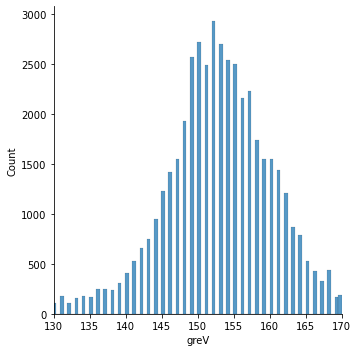

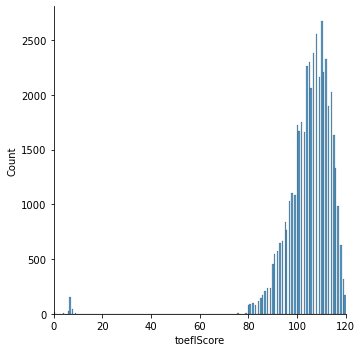

In [26]:
#look toelf,GRE score distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(original_data['greV'],kind='hist')
plt.xlim(130,170)
sns.displot(original_data['toeflScore'].apply(lambda x:toeflScore_change(x)),kind='hist')
plt.xlim(0,120)

In [27]:
# choose record which only contains 'MS' program
df = original_data[original_data['program']=='MS']
df.drop(['program'],inplace=True,axis=1)
df['gpa_convert'] = df['cgpa']/df['cgpaScale']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\1308111683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['program'],inplace=True,axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\1308111683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gpa_convert'] = df['cgpa']/df['cgpaScale']


In [28]:
#delete useless columns
df.drop(['topperCgpa','department'],axis=1,inplace=True)
df['univName'].value_counts()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\3901751874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['topperCgpa','department'],axis=1,inplace=True)


North Carolina State University                        2965
University of Texas Dallas                             2789
Arizona State University                               2678
University of Florida                                  1957
SUNY Buffalo                                           1947
Texas A and M University College Station               1821
Georgia Institute of Technology                        1681
Northeastern University                                1680
University of Southern California                      1678
University of Illinois Chicago                         1573
SUNY Stony Brook                                       1344
Carnegie Mellon University                             1136
Syracuse University                                    1122
University of Minnesota Twin Cities                    1042
University of North Carolina Charlotte                  911
University of Cincinnati                                895
University of Maryland College Park     

In [29]:
# Calculate the admission rate of each undergraduate school applying to all schools and applying to famous schools
famous_univ = ['Georgia Institute of Technology','Carnegie Mellon University','University of Southern California','Purdue University','University of Wisconsin Madison','University of Pennsylvania','University of Illinois Urbana-Champaign','University of California San Diego','University of Michigan Ann Arbor','Cornell University','New York University','Columbia University','University of Washington','Stanford University','Johns Hopkins University','Northwestern University','Massachusetts Institute of Technology','Princeton University','California Institute of Technology','Harvard University']
large_sample = []
count_univ = df['ugCollege'].value_counts()
for i in range(len(count_univ)):
    if count_univ[i]>100:
        large_sample.append(count_univ.index[i])

bachelor_univ = df['ugCollege'].dropna().unique()
ad_rate_rank = {}
large_sample_rank={}
famous_univ_large_sample_admission_rank = {}
famous_univ_admission_rank = {}
for i in bachelor_univ:
    admission_rate = len(df[(df['ugCollege']==i)&(df['admit']==1)])/len(df[df['ugCollege']==i])
    if len(df[(df['ugCollege']==i)&(df['univName'].isin(famous_univ))])!=0:
        famous_univ_admission_rate = len(df[(df['ugCollege']==i)&(df['admit']==1)&(df['univName'].isin(famous_univ))])/len(df[(df['ugCollege']==i)&(df['univName'].isin(famous_univ))])
    else:
        famous_univ_admission_rate=0
    famous_univ_admission_rank[i] = famous_univ_admission_rate
    ad_rate_rank[i] = admission_rate
    if i in large_sample:
        large_sample_rank[i] = admission_rate
        famous_univ_large_sample_admission_rank[i] = famous_univ_admission_rate

In [30]:
#Undergraduate university levels are classified according to the admission rate of famous universities.
top_univ = []
famous_univ = []
good_univ = []
soso_univ = []
other_univ = []
for i in famous_univ_admission_rank:
    if famous_univ_admission_rank[i]>0.8:
        top_univ.append(i)
    elif famous_univ_admission_rank[i]>=0.5 and famous_univ_admission_rank[i]<0.8:
        famous_univ.append(i)
    elif famous_univ_admission_rank[i]>=0.3 and famous_univ_admission_rank[i]<0.5:
        good_univ.append(i)
    elif famous_univ_admission_rank[i]>=0.2 and famous_univ_admission_rank[i]<0.3:
        soso_univ.append(i)
    else:
        other_univ.append(i)
print('top_univ：',len(top_univ))
print('famous_univ：',len(famous_univ))
print('good_univ：',len(good_univ))
print('soso_univ：',len(soso_univ))
print('other_univ:',len(other_univ))

top_univ： 168
famous_univ： 146
good_univ： 159
soso_univ： 55
other_univ: 943


In [31]:
df[df['ugCollege'].isin(top_univ)]
def ugCollege_mapping(x):
    if x in top_univ:
        return(1)
    elif x in famous_univ:
        return(2)
    elif x in good_univ:
        return(3)
    elif x in soso_univ:
        return(4)
    else:
        return(5)
df['map_ugCollege_level'] = df['ugCollege'].apply(lambda x:ugCollege_mapping(x))
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\390590618.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['map_ugCollege_level'] = df['ugCollege'].apply(lambda x:ugCollege_mapping(x))


,major,researchExp,industryExp,toeflScore,internExp,greV,greQ,journalPubs,greA,termAndYear,confPubs,ugCollege,cgpa,cgpaScale,univName,admit,major_code,gpa_convert,map_ugCollege_level
0,Systems and Control,0,18,112.0,5.0,160.0,167.0,0,4.5,Fall - 2015,0,Dharamsinh Desai University,8.50,10,Worcester Polytechnic Institute,1,NaN,0.8500,4
1,(MIS / MSIM / MSIS / MSIT),0,66,94.0,0.0,146.0,157.0,0,3.0,Fall - 2015,0,IET DAVV,78.28,100,Worcester Polytechnic Institute,1,BA,0.7828,3
2,MIS,0,0,81.0,0.0,138.0,170.0,0,2.5,Fall - 2011,0,Pune University,57.00,100,Worcester Polytechnic Institute,1,BA,0.5700,3
4,MIS,0,0,104.0,0.0,150.0,161.0,0,4.5,Fall - 2015,0,University of Mumbai,62.20,100,Worcester Polytechnic Institute,1,BA,0.6220,3
5,MIS-management related courses,0,0,95.0,0.0,147.0,156.0,0,3.0,Fall - 2012,0,MU,52.00,100,Worcester Polytechnic Institute,1,BA,0.5200,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51325,Aerospace Engineering,0,0,87.0,0.0,150.0,159.0,0,2.5,Spring - 2013,0,JNTU,65.00,100,Arizona State University,0,OE,0.6500,3
51327,Mechanical Engineering,0,24,98.0,12.0,151.0,152.0,0,3.0,Fall - 2014,0,University of Mumbai,71.00,100,Arizona State University,0,OE,0.7100,3
51328,Electronics and Communication,0,0,115.0,0.0,151.0,170.0,0,4.5,Fall - 2012,0,BITS Hyderabad,6.50,10,Arizona State University,0,EE,0.6500,3
51330,Electrical Engineering,0,0,99.0,0.0,143.0,170.0,0,3.5,Fall - 2011,0,Panjab University,70.50,100,Arizona State University,0,EE,0.7050,2


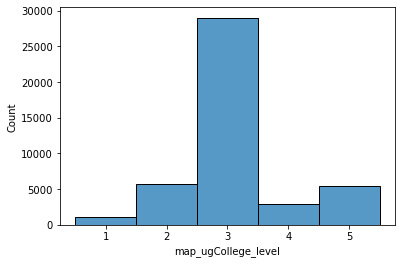

In [16]:
sns.histplot(df['map_ugCollege_level'].astype('category'))
plt.savefig('major_mapping.png', dpi=300) 
plt.show()

In [32]:
#df.drop(['ugCollege'],inplace=True,axis=1)
df['gpa_convert'] = df['cgpa']/df['cgpaScale']
df['major_code']=df['major_code'].astype('category')
df['univName']= df['univName'].astype('category')
df = df.astype('category')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\3700184440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gpa_convert'] = df['cgpa']/df['cgpaScale']
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\3700184440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['major_code']=df['major_code'].astype('category')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22296\3700184440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [33]:
attr = ['researchExp','toeflScore','internExp','greV','greQ','greA','gpa_convert','major_code','map_ugCollege_level','univName','admit']
df = df[attr]
df = df.drop_duplicates()
df

,researchExp,toeflScore,internExp,greV,greQ,greA,gpa_convert,major_code,map_ugCollege_level,univName,admit
0,0,112.0,5.0,160.0,167.0,4.5,0.8500,NaN,4,Worcester Polytechnic Institute,1
1,0,94.0,0.0,146.0,157.0,3.0,0.7828,BA,3,Worcester Polytechnic Institute,1
2,0,81.0,0.0,138.0,170.0,2.5,0.5700,BA,3,Worcester Polytechnic Institute,1
4,0,104.0,0.0,150.0,161.0,4.5,0.6220,BA,3,Worcester Polytechnic Institute,1
5,0,95.0,0.0,147.0,156.0,3.0,0.5200,BA,3,Worcester Polytechnic Institute,1
...,...,...,...,...,...,...,...,...,...,...,...
51325,0,87.0,0.0,150.0,159.0,2.5,0.6500,OE,3,Arizona State University,0
51327,0,98.0,12.0,151.0,152.0,3.0,0.7100,OE,3,Arizona State University,0
51328,0,115.0,0.0,151.0,170.0,4.5,0.6500,EE,3,Arizona State University,0
51330,0,99.0,0.0,143.0,170.0,3.5,0.7050,EE,2,Arizona State University,0


In [34]:
df.columns=['research','toefl','intern','greV','greQ','greA','gpa','major','univ','target_univ','admit']
df

,research,toefl,intern,greV,greQ,greA,gpa,major,univ,target_univ,admit
0,0,112.0,5.0,160.0,167.0,4.5,0.8500,NaN,4,Worcester Polytechnic Institute,1
1,0,94.0,0.0,146.0,157.0,3.0,0.7828,BA,3,Worcester Polytechnic Institute,1
2,0,81.0,0.0,138.0,170.0,2.5,0.5700,BA,3,Worcester Polytechnic Institute,1
4,0,104.0,0.0,150.0,161.0,4.5,0.6220,BA,3,Worcester Polytechnic Institute,1
5,0,95.0,0.0,147.0,156.0,3.0,0.5200,BA,3,Worcester Polytechnic Institute,1
...,...,...,...,...,...,...,...,...,...,...,...
51325,0,87.0,0.0,150.0,159.0,2.5,0.6500,OE,3,Arizona State University,0
51327,0,98.0,12.0,151.0,152.0,3.0,0.7100,OE,3,Arizona State University,0
51328,0,115.0,0.0,151.0,170.0,4.5,0.6500,EE,3,Arizona State University,0
51330,0,99.0,0.0,143.0,170.0,3.5,0.7050,EE,2,Arizona State University,0


In [57]:
df.to_csv('very_clean_data.csv',encoding='utf-8',index=False)

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report, make_scorer
df = df.astype('category')
X = df.drop('admit', axis=1)
y = df['admit']
lgb_params = {
    'objective': 'binary',
    'max_depth':30,
    'num_leaves': 30,
    'learning_rate': 0.01,
    'n_estimators': 100
}
lgb_classifier = lgb.LGBMClassifier(**lgb_params)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 定义准确度评分函数
accuracy_scorer = make_scorer(accuracy_score)

# 执行交叉验证
cv_scores = cross_val_score(lgb_classifier, X, y, cv=kf, scoring=accuracy_scorer)

# 输出每折交叉验证的准确度
for i, score in enumerate(cv_scores, 1):
    print(f'Fold {i} Accuracy: {score}')

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 20097, number of negative: 19548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 39645, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506924 -> initscore=0.027698
[LightGBM] [Info] Start training from score 0.027698
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large numb

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lgb_params = {
    'objective': 'binary',
    'max_depth':20,
    'num_leaves': 30,
    'learning_rate': 0.01,
    'n_estimators': 100
}
models = {
    "LGB": lgb.LGBMClassifier(**lgb_params)
}
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LGB 
--------------
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 15615, number of negative: 15220
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1435
[LightGBM] [Info] Number of data points in the train set: 30835, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506405 -> initscore=0.025622
[LightGBM] [Info] Start training from score 0.025622
Training Accuracy: 0.7233663045240798
Testing Accuracy: 0.6974878934624698
Testing Confusion Matrix: 
[[4378 2123]
 [1875 4840]]
Testing Recall: 0.7207743857036486
Testing Precesion: 0.6951026856240127
Testing F-1: 0.7077058049422431
Testing 

In [112]:
univ_df = df['target_univ'].drop_duplicates()
univ_df.to_csv('univ_name.csv',index=False,encoding='utf-8')
major_df = df['major'].drop_duplicates()
major_df.to_csv('major.csv',index=False,encoding='utf-8')

In [45]:
import joblib
from sklearn.linear_model import LogisticRegression
lgb_model = models['LGB'].fit(X,y)
y_predict = lgb_model.predict_proba(X)
print(y_predict[:,1])
print(y_score)
lr_model = LogisticRegression().fit(y_predict,y)
y_score = lr_model.predict_proba(y_predict)[:,1]
joblib.dump(lgb_model, 'model_lgbm.pkl')
joblib.dump(lr_model, 'model_lr.pkl')

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 22330, number of negative: 21721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1613
[LightGBM] [Info] Number of data points in the train set: 44051, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506912 -> initscore=0.027652
[LightGBM] [Info] Start training from score 0.027652
[0.65740751 0.53562487 0.58925195 ... 0.51513977 0.52254983 0.43006925]
[0.80227167 0.57220298 0.68557362 ... 0.5260216  0.54282049 0.3382731 ]


['model_lr.pkl']

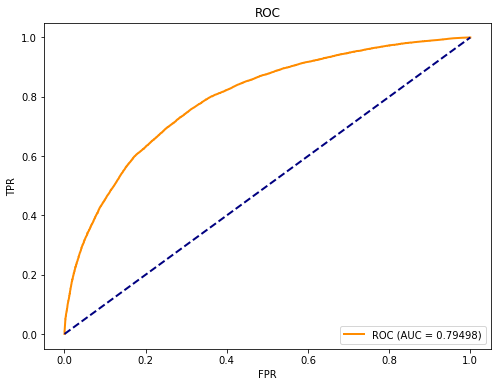

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.savefig('roc.jpg',dpi=400)
plt.show()

In [46]:
model = joblib.load('model_lgbm.pkl')
import sys
import dask

print("Python 版本是", sys.version)
print("Pandas 版本是", pd.__version__)
print("Lightgbm 版本是", lgb.__version__)
print("dask 版本是", dask.__version__)

Python 版本是 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Pandas 版本是 1.4.2
Lightgbm 版本是 4.1.0
dask 版本是 2022.02.1


In [47]:
!pip freeze > requirements.txt

       Feature  Importance
9  target_univ         952
6          gpa         783
7        major         419
4         greQ         311
1        toefl         214
3         greV         178
5         greA          23
8         univ          20
0     research           0
2       intern           0


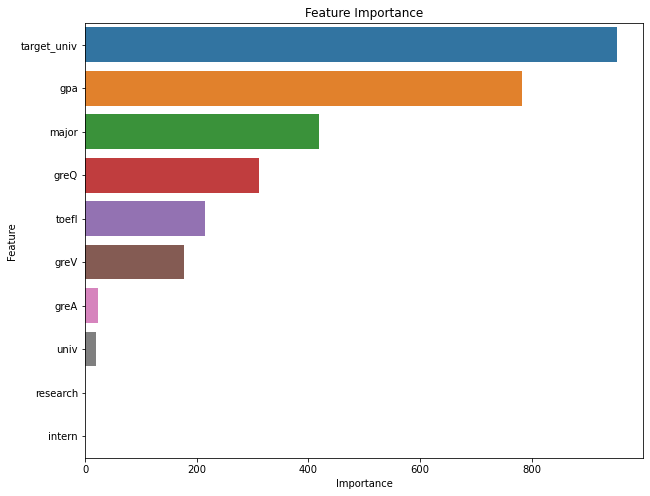

In [131]:
feature_importance = lgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印或可视化特征重要性
print(feature_importance_df)

# 可视化特征重要性
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [53]:
df.columns=['research','toefl','intern','greV','greQ','greA','gpa','major','univ','target_univ','admit']
testdata = pd.DataFrame(
 {
 'research':[5],
 'toefl':[115],
 'intern':[5],
 'greV':[167],
 'greQ':[170],
 'greA':[4.5],
 'gpa':[0.9],
 'major':['CS'],
 'univ':[1.0],
 'target_univ':['Columbia University']
 }
 )
testdata = testdata.astype('category')
print(models['LGB'].predict(testdata))
lgb_out_put_5 = models['LGB'].predict_proba(x_test.iloc[0:5])
print(lgb_out_put_5)
print(lr_model.predict_proba(lgb_out_put_5))
print(models['LGB'].predict_proba(testdata))
lgb_output = models['LGB'].predict_proba(testdata)
print(lr_model.predict(lgb_output))
print('录取概率：',lr_model.predict_proba(lgb_output)[0][1])

[1]
[[0.50933326 0.49066674]
 [0.6263652  0.3736348 ]
 [0.36056234 0.63943766]
 [0.66100335 0.33899665]
 [0.38762831 0.61237169]]
[[0.52967077 0.47032923]
 [0.76588896 0.23411104]
 [0.22499202 0.77500798]
 [0.81770443 0.18229557]
 [0.27087698 0.72912302]]
[[0.38256332 0.61743668]]
[1]
录取概率： 0.7381414407908535
